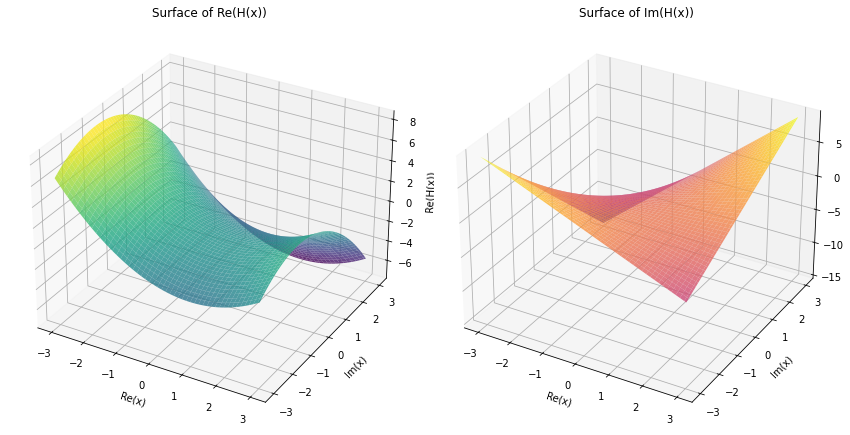

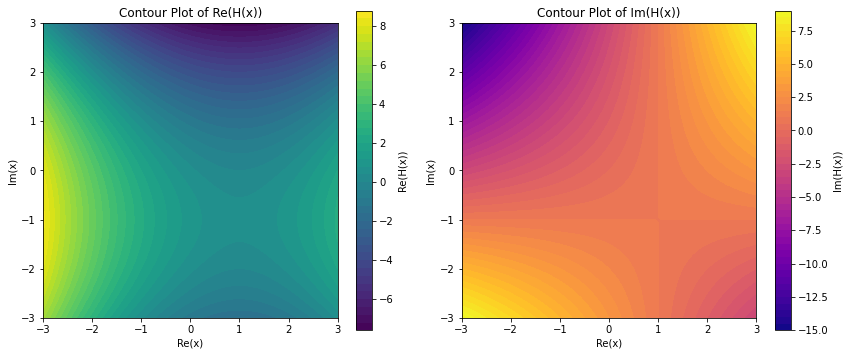

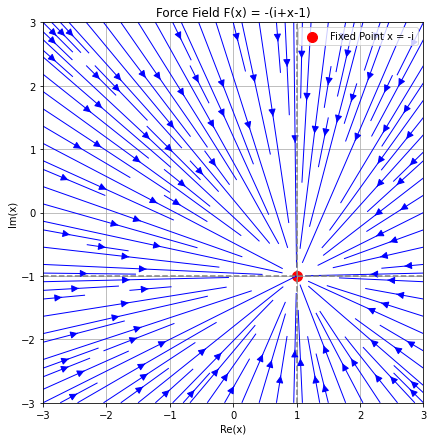

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Hamiltonian function
def H(x_complex):
    return 1j * x_complex + (x_complex-1)**2 / 2

# Create a meshgrid for the complex x-plane
x_real = np.linspace(-3, 3, 100)
x_imag = np.linspace(-3, 3, 100)
X_REAL, X_IMAG = np.meshgrid(x_real, x_imag)
X_COMPLEX = X_REAL + 1j * X_IMAG

# Calculate Re(H(x)) and Im(H(x))
H_VALS = H(X_COMPLEX)
H_REAL = np.real(H_VALS)
H_IMAG = np.imag(H_VALS)

# --- Plotting the Surface of Re(H(x)) ---
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X_REAL, X_IMAG, H_REAL, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Re(x)')
ax1.set_ylabel('Im(x)')
ax1.set_zlabel('Re(H(x))')
ax1.set_title('Surface of Re(H(x))')

# --- Plotting the Surface of Im(H(x)) ---
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_REAL, X_IMAG, H_IMAG, cmap='plasma', alpha=0.8)
ax2.set_xlabel('Re(x)')
ax2.set_ylabel('Im(x)')
ax2.set_zlabel('Im(H(x))')
ax2.set_title('Surface of Im(H(x))')

plt.tight_layout()
plt.show()

# --- Plotting Contour Maps for better 2D visualization ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Contour plot for Re(H(x))
contour1 = axes[0].contourf(X_REAL, X_IMAG, H_REAL, levels=50, cmap='viridis')
fig.colorbar(contour1, ax=axes[0], label='Re(H(x))')
axes[0].set_xlabel('Re(x)')
axes[0].set_ylabel('Im(x)')
axes[0].set_title('Contour Plot of Re(H(x))')
axes[0].set_aspect('equal', adjustable='box')

# Contour plot for Im(H(x))
contour2 = axes[1].contourf(X_REAL, X_IMAG, H_IMAG, levels=50, cmap='plasma')
fig.colorbar(contour2, ax=axes[1], label='Im(H(x))')
axes[1].set_xlabel('Re(x)')
axes[1].set_ylabel('Im(x)')
axes[1].set_title('Contour Plot of Im(H(x))')
axes[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# --- Visualization with a streamplot of the force field (negative gradient of H) ---
# The force is F(x) = -dH/dx = -(i + x)
# F_real = -Re(i+x) = -Re(i + x_R + i x_I) = -(-x_I) = x_I
# F_imag = -Im(i+x) = -Im(i + x_R + i x_I) = -(1 + x_R)
# Wait, this is not how it works. F is a complex number. F = F_R + i F_I
# F(x) = -(1j + x_R + 1j * x_I) = -x_R - 1j - 1j * x_I = -x_R - 1j(1+x_I)
# So F_R = -x_R and F_I = -(1+x_I)

F_REAL = -(X_REAL - 1)
F_IMAG = -(1 + X_IMAG)

plt.figure(figsize=(7, 7))
plt.streamplot(X_REAL, X_IMAG, F_REAL, F_IMAG, density=1.5, linewidth=1, color='blue', arrowsize=1.5)
plt.xlabel('Re(x)')
plt.ylabel('Im(x)')
plt.title('Force Field F(x) = -(i+x-1)')
plt.grid(True)
plt.axvline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')
plt.scatter(1, -1, color='red', marker='o', s=100, label='Fixed Point x = -i')
plt.legend()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()